# Title : Titanic Survival Prediction 

#### Kaggle Starter Project | Classification | Random Forest / XGBoost  

Project Overview
- Objective: Predict survival outcomes (Survived) of passengers aboard the Titanic using their personal and ticket-related attributes.
- Dataset: Titanic dataset from Kaggle (train.csv, test.csv)
- Type: Binary classification (0 = did not survive, 1 = survived)

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, roc_auc_score

### import csv file

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [3]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


## Exploratory Data Analysis (EDA)

In [4]:
# check duplicates
print(f'train shape {train.shape}', train.duplicated().sum())
print(f'test shape {test.shape}', test.duplicated().sum())

train shape (891, 12) 0
test shape (418, 11) 0


In [5]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### Explore data sets

In [6]:
# check missing values
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
# check missing values
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [8]:
print(train['Sex'].unique())
print(test['Sex'].unique())

['male' 'female']
['male' 'female']


In [9]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [11]:
test[test['Fare'].isna()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


There’s no significant difference between the median and mean of the ‘Age’ column.


In [12]:
# To check if Cabin missing values are random or pattern-based

cabin_rate = train.groupby('Pclass')['Cabin'].apply(lambda x: x.notnull().mean()).reset_index()
cabin_rate

,Pclass,Cabin
0,1,0.814815
1,2,0.086957
2,3,0.024440


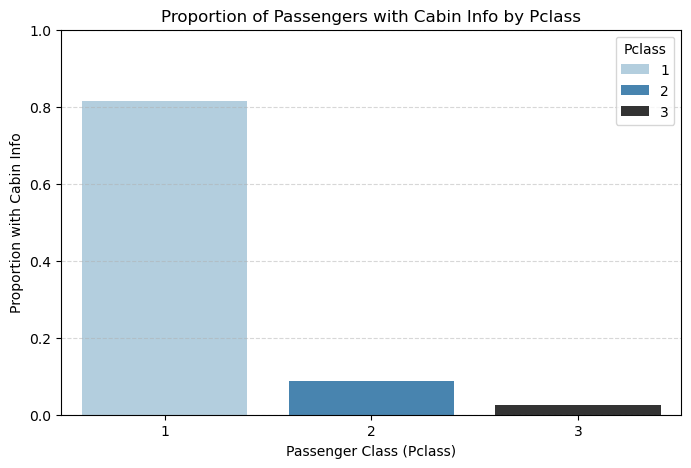

In [13]:
# rename the columns
cabin_rate.columns = ['Pclass', 'Cabin_NotNull_Rate']

plt.figure(figsize=(8, 5))
sns.barplot(x='Pclass', y='Cabin_NotNull_Rate', hue='Pclass', data=cabin_rate, palette='Blues_d')

plt.title('Proportion of Passengers with Cabin Info by Pclass')
plt.xlabel('Passenger Class (Pclass)')
plt.ylabel('Proportion with Cabin Info')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.show()

- **Passengers with missing Cabin values** are more likely to be in **third** class, which may suggest a lower priority for rescue. <br>
- Although Cabin could be an important feature, it contains many missing values.
Therefore, it would be better to be converted into **a binary variable** indicating the presence or absence of Cabin information.

#### Visualized survival rates by each columns

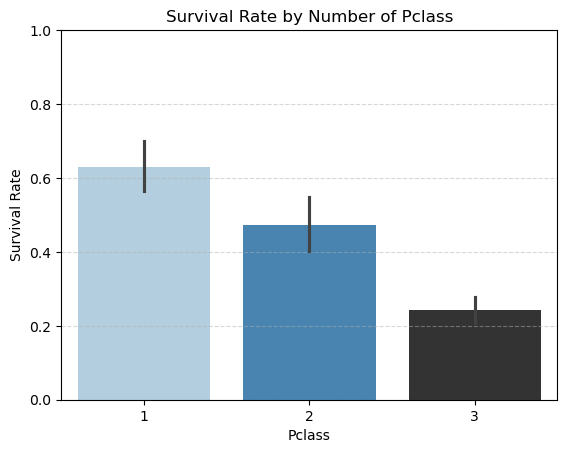

In [14]:
# to check 'Pclass' column is related with 'survived' coulmn
sns.barplot(x='Pclass', hue='Pclass', y='Survived', data=train, legend=False, palette='Blues_d')
plt.title('Survival Rate by Number of Pclass')
plt.xlabel('Pclass')
plt.ylabel('Survival Rate')
plt.ylim(0, 1) # for rate
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

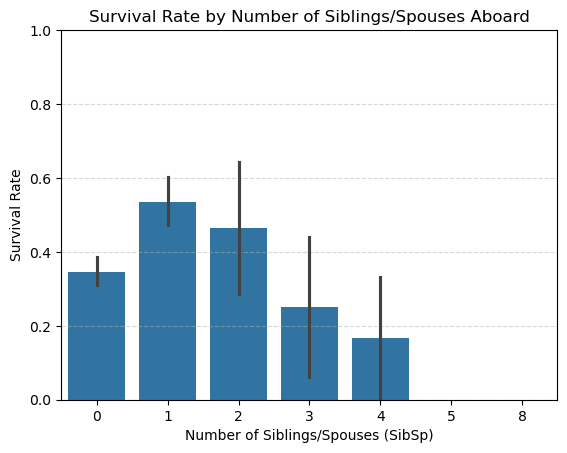

In [15]:
# to check 'SibSp' column is related with 'survived' coulmn
sns.barplot(x='SibSp', y='Survived', data=train)
plt.title('Survival Rate by Number of Siblings/Spouses Aboard')
plt.xlabel('Number of Siblings/Spouses (SibSp)')
plt.ylabel('Survival Rate')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

Passengers with **fewer than 3 siblings or spouses** had the highest survival rate.

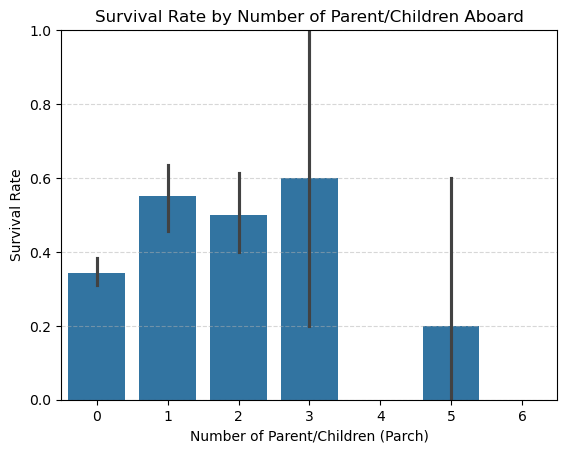

In [16]:
# to check 'Parch' column is related with 'survived' coulmn
sns.barplot(x='Parch', y='Survived', data=train)
plt.title('Survival Rate by Number of Parent/Children Aboard')
plt.xlabel('Number of Parent/Children (Parch)')
plt.ylabel('Survival Rate')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

Those traveling with **parent or children** had a higher survival rate. 

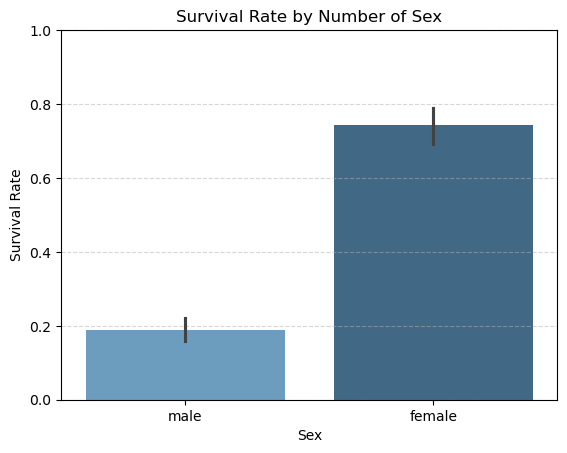

In [17]:
# to check 'Sex' column is related with 'survived' coulmn
sns.barplot(x='Sex', hue='Sex', y='Survived', data=train, legend=False, palette='Blues_d')
plt.title('Survival Rate by Number of Sex')
plt.xlabel('Sex')
plt.ylabel('Survival Rate')
plt.ylim(0, 1) # for rate
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

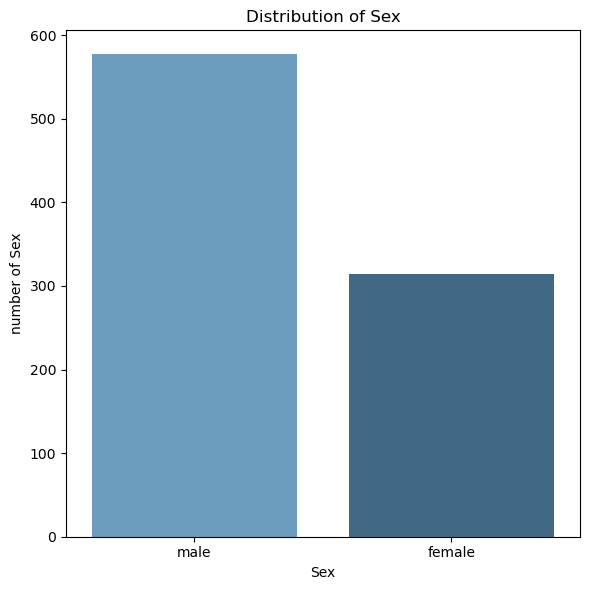

In [18]:
plt.figure(figsize=(6, 6))

sns.countplot(x='Sex', hue='Sex', data=train, legend=False, palette='Blues_d')
plt.title(f'Distribution of Sex')
plt.xlabel('Sex')
plt.ylabel(f'number of Sex')

plt.tight_layout()
plt.show()

Although there were nearly twice as many male passengers as female passengers on board, the survival rate for females was significantly higher (0.8) compared to males (0.2). <br>
This indicates that gender played a major role in survival, likely due to the “women and children first” policy during evacuation.

## Preprocessing

In the **train** dataset, there are missing values in the ‘Age’, ‘Cabin’, and ‘Embarked’ columns.<br>
In the **test** dataset, there are missing values in the ‘Age’, ‘Fare’, and ‘Cabin’ columns.

### Handling missing values

In [19]:
def preprocessing(df) :
    # change numeric tpye in sex column
    df['Sex'] = df['Sex'].map({'male':0, 'female':1})

    # fill value in missing values
    df['Age'].fillna(df['Age'].median(), inplace=True)
    # for train
    df['Embarked'].fillna(df['Embarked'].mode().iloc[0], inplace=True)
    # for test
    df['Fare'] = df.groupby(['Pclass', 'Embarked'])['Fare'].transform(lambda x: x.fillna(x.mean()))
    # manage missing values of 'Cabin' column
    df['Has_Cabin'] = df['Cabin'].notnull().astype(int)
    
    # drop name, ticket, cabin column
    df.drop(columns=['Name','Ticket','Cabin'], inplace=True)    
    return df

In [20]:
train = preprocessing(train)
test = preprocessing(test)

print(train.isnull().sum())
print(test.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
Has_Cabin      0
dtype: int64
PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
Has_Cabin      0
dtype: int64


### Handling Outliers

In [21]:
print(train['Has_Cabin'].unique())
print(test['Has_Cabin'].unique())

[0 1]
[0 1]


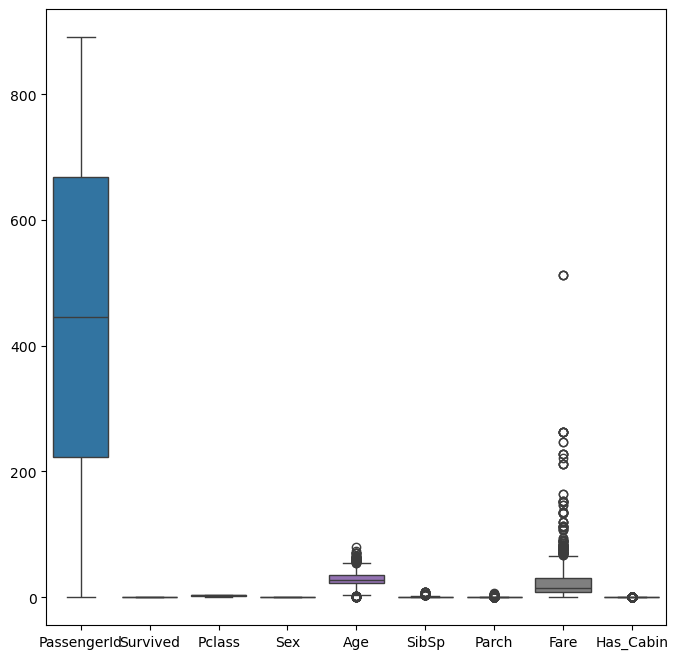

In [22]:
#Find if there are outliers for train
plt.figure(figsize=(8, 8))
sns.boxplot(data=train)
plt.show()

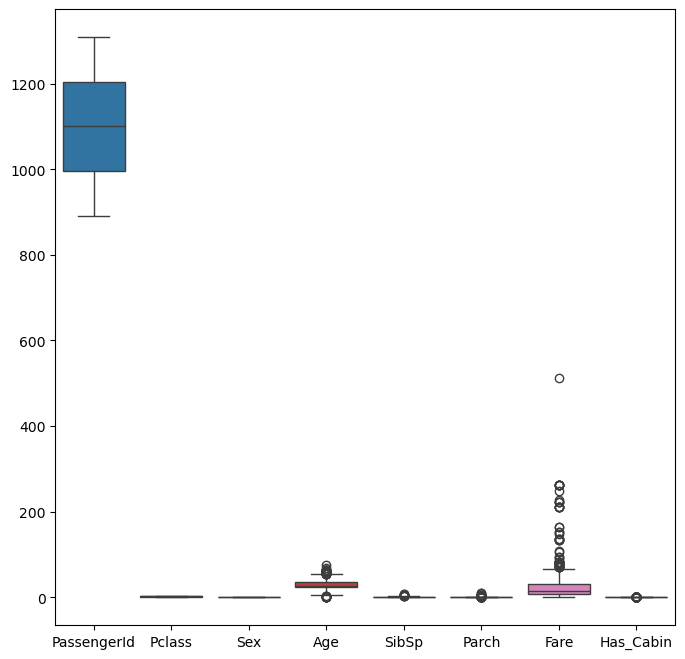

In [23]:
#Find if there are outliers for test
plt.figure(figsize=(8, 8))
sns.boxplot(data=test)
plt.show()

I initially thought life expectancy in 1912 was low, so I considered treating older ages as outliers.
However, I found an article mentioning a 71-year-old passenger, so I decided not to consider it an outlier.

In [24]:
outlier_columns = ['Fare']

def has_outlier_pct(df):
    for col in outlier_columns:        
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        
        outliers = df[(df[col] < lower) | (df[col] > upper)]
        pct = len(outliers)/len(df)*100.0
        print(f"potential outliers of {col} percentage : {pct:.2f}%")

def using_iqr(df):
    for col in outlier_columns:
        
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1 
        
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # set median instead of outlier
        median_value = df[col].median()
        df.loc[(df[col] < lower_bound) | (df[col] > upper_bound), col] = median_value

In [25]:
print('train')
has_outlier_pct(train)
print('---------------')
print('test')
has_outlier_pct(test)

using_iqr(train)
using_iqr(test)

print('\nAfter handling Outliers')

print('train')
has_outlier_pct(train)
print('---------------')
print('test')
has_outlier_pct(test)

train
potential outliers of Fare percentage : 13.02%
---------------
test
potential outliers of Fare percentage : 13.16%

After handling Outliers
train
potential outliers of Fare percentage : 5.39%
---------------
test
potential outliers of Fare percentage : 7.18%


In [26]:
print(f'train shape : {train.shape}, test shape : {test.shape}')

train shape : (891, 10), test shape : (418, 9)


### Encoding

In [27]:
# for Embarked
le = LabelEncoder()
train['Embarked'] = le.fit_transform(train['Embarked'])
test['Embarked'] = le.transform(test['Embarked'])

print(f'train shape : {train.shape}, test shape : {test.shape}')

train shape : (891, 10), test shape : (418, 9)


In [28]:
train['Embarked'].head()

0    2
1    0
2    2
3    2
4    2
Name: Embarked, dtype: int64

### check the Correlation

In [29]:
train_matrix = train.corr()
train_matrix

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Has_Cabin
PassengerId,1.000000,-0.005007,-0.035144,-0.042939,0.034212,-0.057527,-0.001652,0.002589,0.013128,0.019919
Survived,-0.005007,1.000000,-0.338481,0.543351,-0.064910,-0.035322,0.081629,0.190926,-0.167675,0.316912
Pclass,-0.035144,-0.338481,1.000000,-0.131900,-0.339898,0.083081,0.018443,-0.433904,0.162098,-0.725541
Sex,-0.042939,0.543351,-0.131900,1.000000,-0.081163,0.114631,0.245489,0.102979,-0.108262,0.140391
Age,0.034212,-0.064910,-0.339898,-0.081163,1.000000,-0.233296,-0.172482,0.067304,-0.018754,0.240314
SibSp,-0.057527,-0.035322,0.083081,0.114631,-0.233296,1.000000,0.414838,0.262825,0.068230,-0.040460
Parch,-0.001652,0.081629,0.018443,0.245489,-0.172482,0.414838,1.000000,0.293337,0.039798,0.036987
Fare,0.002589,0.190926,-0.433904,0.102979,0.067304,0.262825,0.293337,1.000000,-0.023439,0.312499
Embarked,0.013128,-0.167675,0.162098,-0.108262,-0.018754,0.068230,0.039798,-0.023439,1.000000,-0.160196
Has_Cabin,0.019919,0.316912,-0.725541,0.140391,0.240314,-0.040460,0.036987,0.312499,-0.160196,1.000000


Correlation of each factor with Survived:
 Sex            0.543351
Has_Cabin      0.316912
Fare           0.190926
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.064910
Embarked      -0.167675
Pclass        -0.338481
Name: Survived, dtype: float64 



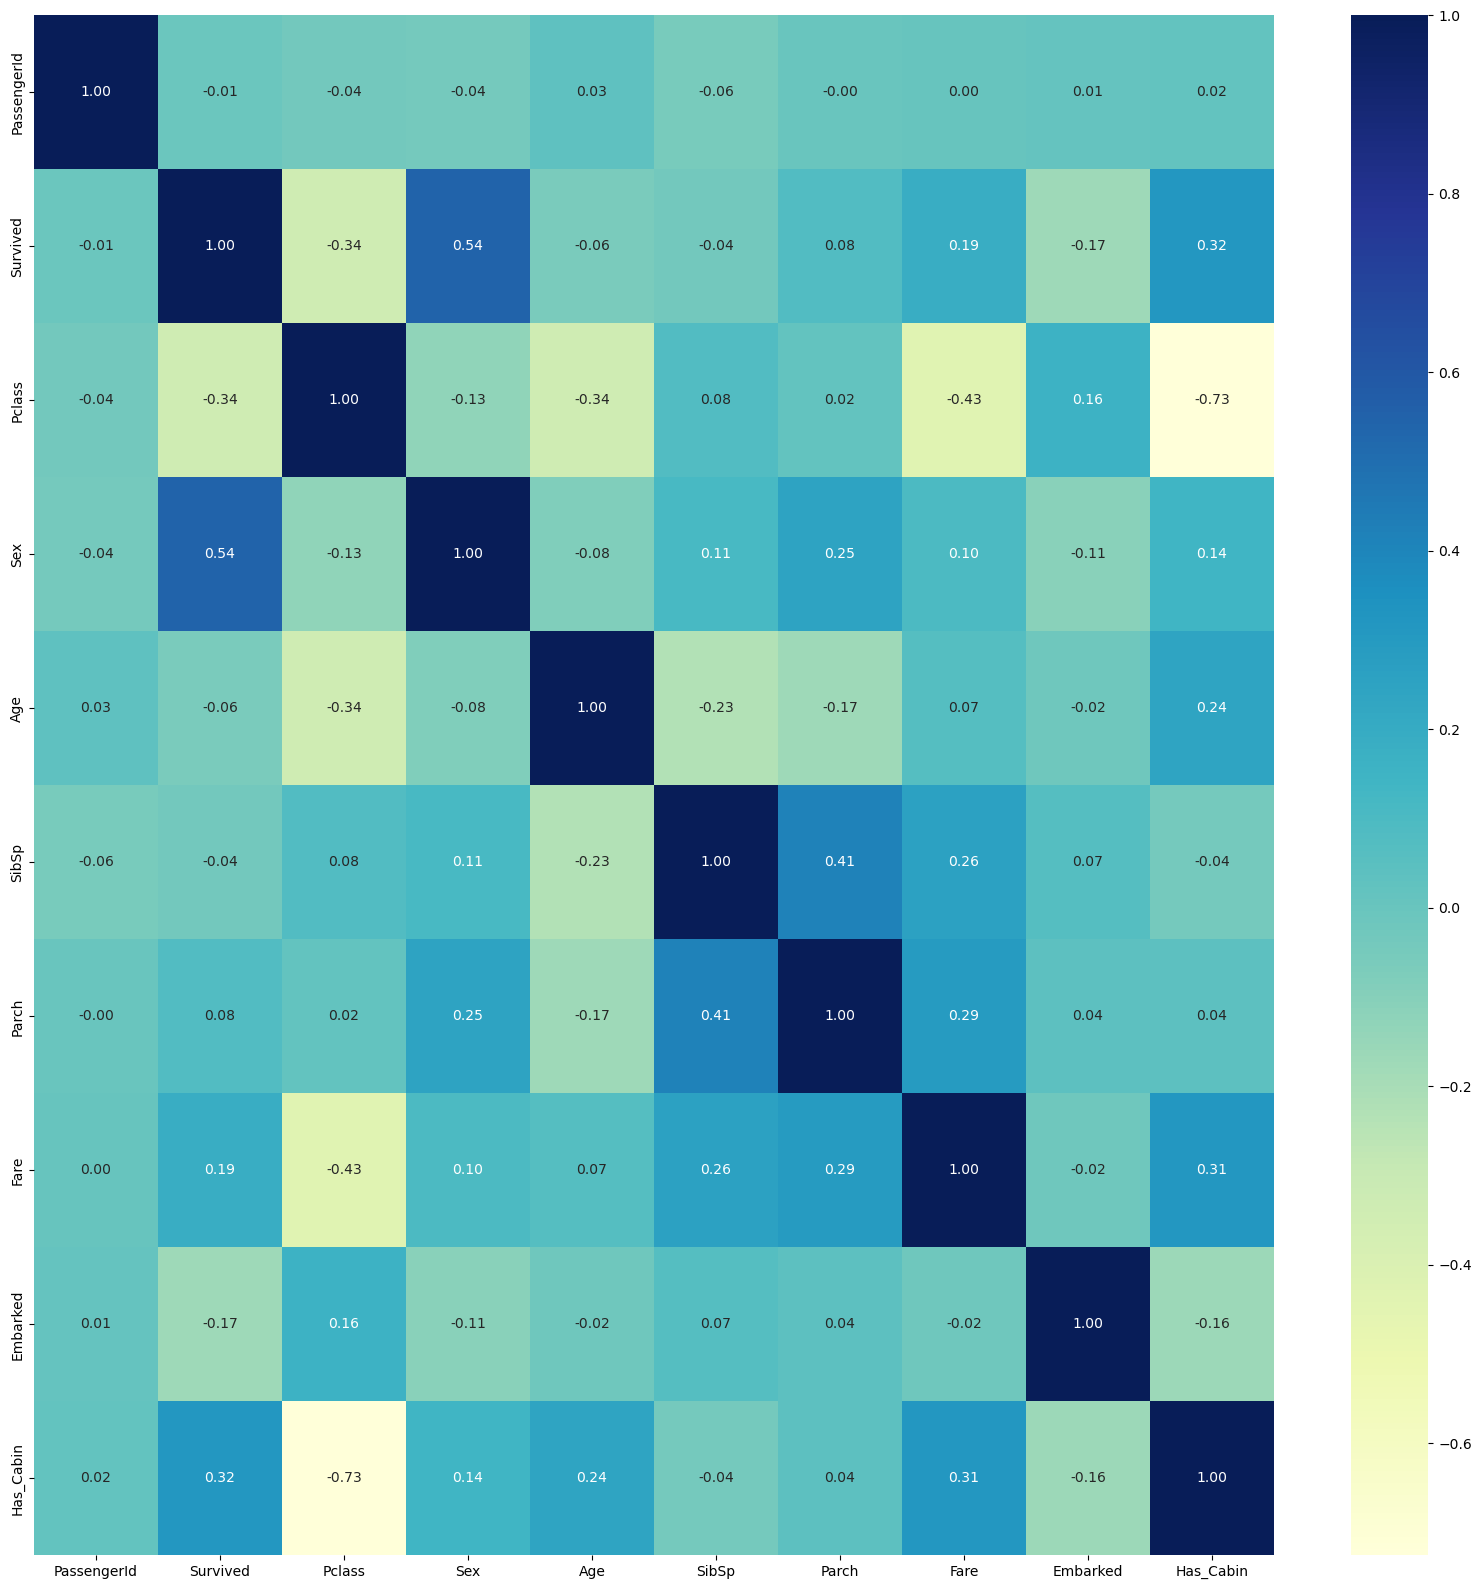

In [30]:
score_corr = train_matrix['Survived'].sort_values(ascending=False)
print("Correlation of each factor with Survived:\n", score_corr[1:], "\n")  # [1:] to skip the first entry which is Score with itself

plt.figure(figsize=(20,20))
sns.heatmap(train_matrix, annot=True, fmt='.2f', cmap='YlGnBu') 
plt.show()

- The following features show a strong correlation with survival, in order of strength:<br>
Sex, Pclass (negative), Has_Cabin, Fare, and Embarked(negative).
- Among these, **Pclass** has a **negative correlation with the survival rate**, indicating that passengers in higher classes (i.e., lower Pclass values) were more likely to survive.

- Similarly, **Embarked column** shows a pattern where passengers from certain embarkation ports had a higher survival rate.

## Develop

### Feature engineering

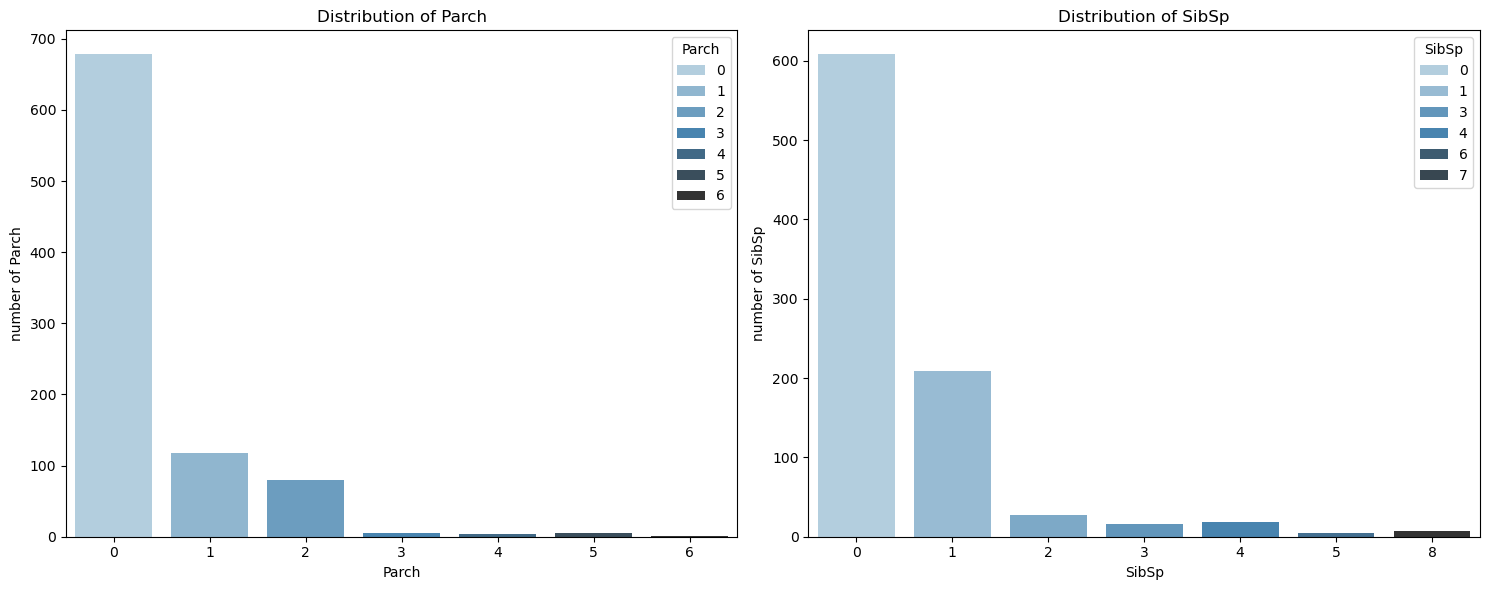

In [31]:
numerical_cols = ['Parch','SibSp']

plt.figure(figsize=(15, 6))

for i, col in enumerate(numerical_cols):
    plt.subplot(1, 2, i + 1)
    sns.countplot(x=col, hue=col, data=train, palette='Blues_d')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel(f'number of {col}')

plt.tight_layout()
plt.show()

### make new columns and label encoding

In [32]:
# label incoding
bins = [0, 10, 18, 27, 45, 100]
labels = [1,2,3,4,5]

# make new column
train['FamilySize'] = train['SibSp'] + train['Parch'] + 1
test['FamilySize'] = test['SibSp'] + test['Parch'] + 1
train['Age_group'] = pd.cut(train['Age'], bins=bins, labels=labels).astype(int)
test['Age_group'] = pd.cut(test['Age'], bins=bins, labels=labels).astype(int)

In [33]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     891 non-null    int64  
 9   Has_Cabin    891 non-null    int64  
 10  FamilySize   891 non-null    int64  
 11  Age_group    891 non-null    int64  
dtypes: float64(2), int64(10)
memory usage: 83.7 KB


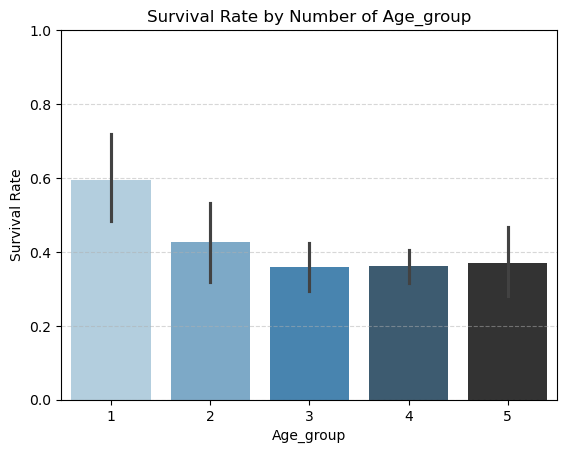

In [35]:
# to check Age_group is related with 'survived' coulmn
sns.barplot(x='Age_group', hue='Age_group', y='Survived', data = train, legend=False, palette='Blues_d')
plt.title('Survival Rate by Number of Age_group')
plt.xlabel('Age_group')
plt.ylabel('Survival Rate')
plt.ylim(0, 1) # for rate
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

An interesting observation from the bar chart analysis was that children aged 0–10 had the highest survival rate among all age groups. This suggests that younger passengers were given priority during evacuation, aligning with the well-known **“children first” policy**.

Although this pattern was visually significant, the correlation coefficient between Age_group and Survived was relatively weak. As a result, the feature was not included in the final model, but this insight still supports the interpretability of survival trends in the dataset.

In [ ]:
train_matrix = train.corr()
score_corr = train_matrix['Survived'].sort_values(ascending=False)
print("Correlation of each factor with Survived:\n", score_corr[1:], "\n")  # [1:] to skip the first entry which is Score with itself

plt.figure(figsize=(20,20))
sns.heatmap(train_matrix, annot=True, fmt='.2f', cmap='YlGnBu') 
plt.show()

- Although new features like FamilySize (sum of SibSp, Parch, and the passenger) and Age_group (binned age categories) were engineered using domain knowledge and label encoding, a correlation analysis showed that these features **did not exhibit** a strong relationship with the target variable Survived.

- Therefore, they were excluded from the final model input. Instead, the following features were selected for training based on their observed importance:
**‘Sex’, ‘Pclass’, ‘Has_Cabin’, ‘Fare’, and ‘Embarked’.**

### Data split

In [ ]:
train.describe()

In [ ]:
def dataset_split(df_train, df_test):
    selected_cols = ['Sex', 'Pclass', 'Has_Cabin', 'Fare', 'Embarked']
    
    X = df_train[selected_cols]
    Y = df_train['Survived']
    
    X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)
    
    X_test = df_test[selected_cols].reset_index(drop=True)
    df_test = df_test.reset_index(drop=True)
    
    return X_train, X_val, Y_train, Y_val, X_test

In [ ]:
X_train, X_val, Y_train, Y_val, X_test = dataset_split(train, test)

Note on Feature Scaling:
Feature scaling was not applied in this project because the final model is based on tree-based algorithms such as Random Forest and XGBoost. These models are invariant to feature scale, as they split data based on feature thresholds rather than distances or distributions. Therefore, scaling would not provide any performance benefit and was intentionally omitted to keep the preprocessing pipeline simple.

## Modeling

 1.	Random Forest 
 2.	XGBoost 

### Random Forest

In [ ]:
model_rf = RandomForestClassifier(random_state=16, n_jobs=-1)

param_grid = {
    "max_depth": [10, 15, 20],  # 1 (underfitting) <---> None (overfitting)
    "min_samples_leaf": [2, 3, 4, 5],
    "min_samples_split": [2, 5],
    "n_estimators": [50, 100]  # how many trees (better to have a lot)
}
# for better one verbose : to show process
grid_rf = GridSearchCV(model_rf, param_grid, cv=5, scoring="accuracy", n_jobs=-1, verbose=1)
grid_rf.fit(X_train, Y_train)

print("Best Parameters:", grid_rf.best_params_)
print("Best Accuracy:", grid_rf.best_score_)

In [ ]:
best_rf = grid_rf.best_estimator_
val_score = best_rf.score(X_val, Y_val)
print("Validation Accuracy:", val_score)

### XGBoost

In [ ]:
model_xgb = XGBClassifier(random_state=16, n_jobs=-1, eval_metric='logloss')

param_grid = {
    'max_depth': [3, 5, 7], # if dataset is small, it's important
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1, 0.2] # to prevent overfitting, if it's bigger, it might be overfitting
}

grid_xgb = GridSearchCV(model_xgb, param_grid, cv=5, scoring="accuracy", n_jobs=-1, verbose=1)
grid_xgb.fit(X_train, Y_train)

print("Best Parameters:", grid_xgb.best_params_)
print("Best Accuracy:", grid_xgb.best_score_)

In [ ]:
best_xgb = grid_xgb.best_estimator_
val_score = best_xgb.score(X_val, Y_val)
print("Validation Accuracy:", val_score)

## Evaluation

In [ ]:
# check the acc and auc
def evaluate_model(model, X_val, Y_val):
    y_pred = model.predict(X_val)
    y_proba = model.predict_proba(X_val)[:, 1] 

    acc = accuracy_score(Y_val, y_pred)
    auc = roc_auc_score(Y_val, y_proba)

    print(f"Validation Accuracy: {acc:.4f}")
    print(f"Validation ROC AUC: {auc:.4f}")

In [ ]:
print('RF Evaluation')
evaluate_model(best_rf, X_val, Y_val)
print('XGB Evaluation')
evaluate_model(best_xgb, X_val, Y_val)

### Export csv files

In [ ]:
models = [('RF', best_rf), ('XGB',best_xgb)]
for name, model in models:
    predictions = model.predict(X_test)
    
    # for submit to attach PassengerId
    submission = pd.DataFrame({
        'PassengerId': test['PassengerId'],
        'Survived': predictions
    })
    
    submission.to_csv(f'submission_{name}.csv', index=False)

## Conclusion

This project built a complete machine learning pipeline on the Titanic dataset, including EDA, preprocessing, modeling, and evaluation, with the goal of predicting passenger survival.

- Key Insights:
	* Exploratory Data Analysis (EDA) showed that survival was strongly associated with features such as Sex, Pclass, and Cabin availability.
	* Passengers aged 0–10 had the highest survival rate, likely due to evacuation priorities favoring children.
	* Features like FamilySize and Age_group were engineered, but excluded from the final model due to low correlation with survival.

- Model Summary:
	* Multiple models were tested, including Logistic Regression, XGBoost, and Random Forest.
	* Random Forest delivered the best performance, achieving:
	* Validation Accuracy: 78.8%
	* ROC-AUC Score: 81.8%

Feature scaling was not applied, as tree-based models like Random Forest are not sensitive to feature scale.

- Final Thoughts:
<br>The Random Forest model successfully captured key survival patterns and delivered the best performance on the validation set.

- This project highlights the importance of:
	* Careful feature selection
	* Understanding model characteristics
	* Interpreting both statistical and real-world patterns (e.g., survival of children)

Further improvements could include advanced ensembling techniques.

### Reflections

Working on the Titanic project taught me more than just applying machine learning techniques—it reminded me of the importance of deeply understanding the dataset itself. While building the pipeline (EDA → Preprocessing → Modeling → Evaluation), I initially focused on feature engineering and model performance. However, as I analyzed survival rates and observed patterns—like the high survival rate among children aged 0-10—I realized that interpreting these insights meaningfully required a solid understanding of the historical context and the data’s reliability.

To ensure the insights were valid, I even explored Titanic-related documents to check whether certain assumptions aligned with actual passenger data and historical facts. This experience showed me that trusting a dataset without verifying its origin or context can be misleading. It’s not just about modeling—it’s about asking why certain patterns exist, how features were recorded, and whether the data accurately reflects reality.

Additionally, through many iterations—trying different encodings, debating between One-Hot and Ordinal scaling, comparing model metrics like accuracy vs. ROC-AUC, and examining why tree-based models don’t require scaling—I gained a much deeper appreciation for how each preprocessing choice influences downstream model performance. Ultimately, I learned that the best-performing model (in my case, Random Forest) only matters if the data feeding into it has been thoughtfully understood and handled.
